In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/Train_data_Update.csv", index_col = "Start_date")

In [2]:
df.columns

Index(['Start_date', 'Year', 'Count', 'Days_Open', 'Avg_Count', 'News_Count',
       'Vis_change_rate', 'big_data_newsCount', 'prev_count', 'mid_count',
       'after_count', 'WeekDay', 'Avg_Tmp', 'High_Tmp', 'Low_Tmp', 'Month',
       'Day'],
      dtype='object')

#### Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

As noted earlier, you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

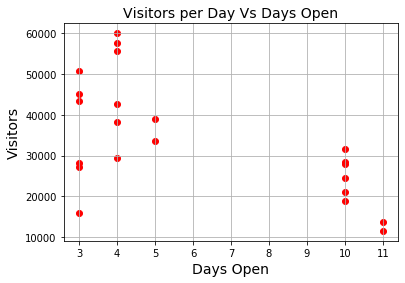

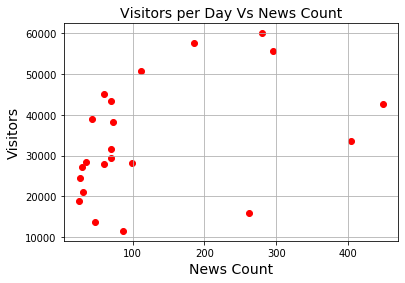

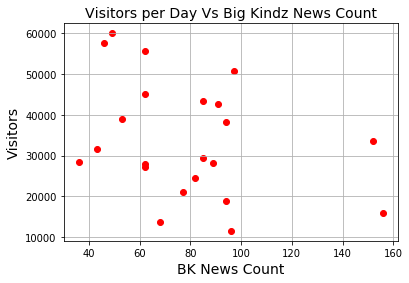

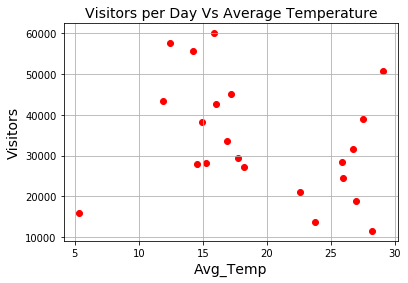

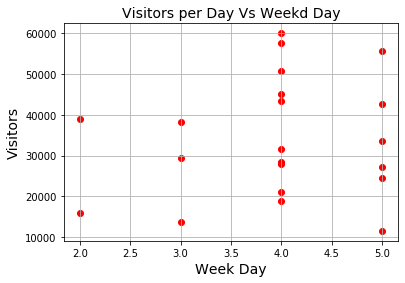

In [8]:
plt.scatter(df['Days_Open'], df['Avg_Count'], color='red')
plt.title('Visitors per Day Vs Days Open', fontsize=14)
plt.xlabel('Days Open', fontsize=14)
plt.ylabel('Visitors', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['News_Count'], df['Avg_Count'], color='red')
plt.title('Visitors per Day Vs News Count', fontsize=14)
plt.xlabel('News Count', fontsize=14)
plt.ylabel('Visitors', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['big_data_newsCount'], df['Avg_Count'], color='red')
plt.title('Visitors per Day Vs Big Kindz News Count', fontsize=14)
plt.xlabel('BK News Count', fontsize=14)
plt.ylabel('Visitors', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['Avg_Tmp'], df['Avg_Count'], color='red')
plt.title('Visitors per Day Vs Average Temperature', fontsize=14)
plt.xlabel('Avg_Temp', fontsize=14)
plt.ylabel('Visitors', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['WeekDay'], df['Avg_Count'], color='red')
plt.title('Visitors per Day Vs Weekd Day', fontsize=14)
plt.xlabel('Week Day', fontsize=14)
plt.ylabel('Visitors', fontsize=14)
plt.grid(True)
plt.show()



### Performing the Multiple Linear Regression


In [22]:
from sklearn import linear_model
import statsmodels.api as sm

In [12]:
df.head()

,Days_Open,Avg_Count,News_Count,Vis_change_rate,big_data_newsCount,prev_count,mid_count,after_count,WeekDay,Avg_Tmp,High_Tmp,Low_Tmp,Month,Day
Start_date,,,,,,,,,,,,,,
2000-08-11,10,18804.60000,25,0.000000,94,54,26,15,4,26.980000,32.020000,23.360000,8,11
2001-08-11,10,24533.80000,27,0.233523,82,39,28,16,5,25.950000,30.450000,22.150000,8,11
2002-08-09,10,20951.00000,31,-0.171009,77,45,20,12,4,22.580000,25.220000,20.850000,8,9
2003-08-07,11,13748.63636,47,-0.523860,68,27,27,14,3,23.772727,27.700000,20.554545,8,7
2004-07-31,11,11508.72727,86,-0.194627,96,68,16,12,5,28.227273,33.327273,24.363636,7,31


In [15]:
#df.drop('Year', axis = 1, inplace=True)
#df.drop('Count', axis = 1, inplace=True)
a = df['Avg_Count'].values
df.drop('Avg_Count', axis = 1, inplace=True)

In [16]:
df['Avg_Count'] = a

In [19]:
df.iloc[:, 1:13]

,News_Count,Vis_change_rate,big_data_newsCount,prev_count,mid_count,after_count,WeekDay,Avg_Tmp,High_Tmp,Low_Tmp,Month,Day
Start_date,,,,,,,,,,,,
2000-08-11,25,0.000000,94,54,26,15,4,26.980000,32.020000,23.360000,8,11
2001-08-11,27,0.233523,82,39,28,16,5,25.950000,30.450000,22.150000,8,11
2002-08-09,31,-0.171009,77,45,20,12,4,22.580000,25.220000,20.850000,8,9
2003-08-07,47,-0.523860,68,27,27,14,3,23.772727,27.700000,20.554545,8,7
2004-07-31,86,-0.194627,96,68,16,12,5,28.227273,33.327273,24.363636,7,31
2005-08-12,35,0.593809,36,23,3,11,4,25.840000,29.480000,23.150000,8,12
2006-08-11,70,0.106239,43,24,15,4,4,26.740000,31.530000,23.070000,8,11
2007-08-15,43,0.188194,53,32,8,13,2,27.520000,32.380000,23.700000,8,15
2008-04-19,30,-0.441126,62,41,3,18,5,18.233333,24.666667,10.900000,4,19


In [20]:
X = df.iloc[:, 1:13] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Avg_Count']

In [23]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 66035.55868251694
Coefficients: 
 [   59.65332448 10591.11504302  -266.87945552   170.42675896
  -174.7267621    -86.21776451 -3563.17435802 -5032.35394353
  3223.02846622  1285.68244798  -718.35866263  -278.01862121]


In [24]:
df.columns

Index(['Days_Open', 'News_Count', 'Vis_change_rate', 'big_data_newsCount',
       'prev_count', 'mid_count', 'after_count', 'WeekDay', 'Avg_Tmp',
       'High_Tmp', 'Low_Tmp', 'Month', 'Day', 'Avg_Count'],
      dtype='object')

In [ ]:
# prediction with sklearn
days_open = 4
News_count = 400
vis_chang = 0.05
big_data_news = 40
prev_count = 10
mid_count = 
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))


In [25]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Avg_Count   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     2.616
Date:                Tue, 29 Oct 2019   Prob (F-statistic):             0.0781
Time:                        11:27:15   Log-Likelihood:                -224.47
No. Observations:                  22   AIC:                             474.9
Df Residuals:                       9   BIC:                             489.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.604e+04   4.19

C:\Users\Joey\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## GUI for Prediction

In [ ]:
from sklearn import linear_model
import tkinter as tk 
import statsmodels.api as sm

df = pd.read_csv("../Data/Train_data_Update.csv", index_col = "Start_date")

df.drop('Year', axis = 1, inplace=True)
df.drop('Count', axis = 1, inplace=True)
a = df['Avg_Count'].values
df.drop('Avg_Count', axis = 1, inplace=True)

df['Avg_Count'] = a

X = df.iloc[:, 1:13] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Avg_Count']


# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 


# tkinter GUI
root= tk.Tk() 
 
canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# with statsmodels
print_model = model.summary()
label_model = tk.Label(root, text=print_model, justify = 'center', relief = 'solid', bg='LightSkyBlue1')
canvas1.create_window(800, 220, window=label_model)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Interest Rate: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Unemployment Rate: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values(): 
    global New_Interest_Rate #our 1st input variable
    New_Interest_Rate = float(entry1.get()) 
    
    global New_Unemployment_Rate #our 2nd input variable
    New_Unemployment_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Average Number of Visitors: ', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Stock Index Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 

root.mainloop()